<a href="https://colab.research.google.com/github/Barbhuiya12/Machine-Learning-/blob/main/Application_of_Hidden_Marcov_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Basic Theory**
Hidden Markov Models (HMMs): HMMs are statistical models where the system being modeled is assumed to be a Markov process with hidden states. The "hidden" aspect comes from our inability to directly observe the states. Instead, we have access to a set of observable variables that provide some information about the hidden states.

In our case, the observable variables are sound data, and the hidden states represent the underlying process (like phonemes in speech) that generated these sounds.

**Installing the required libraries** 

In [1]:
pip install hmmlearn


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 160.4/160.4 kB 4.1 MB/s eta 0:00:00


**Importing the libraries**

In [2]:
import numpy as np
from hmmlearn import hmm

**Creating a random sound**

In [6]:
# Define a function to generate random sound data
def generate_sound_data(n_samples=100, n_features=2):
    """Generate a sequence of sound data with given number of samples and features."""
    return np.random.random((n_samples, n_features))

# Generate some random sound data for different sounds
sounds_data = [generate_sound_data(n_samples) for n_samples in [100, 80, 90]]

**HIDDIN MARKOV MODEL**

In [7]:
# Initialize GaussianHMM
model = hmm.GaussianHMM(n_components=3)  # We have 3 different sounds

# Concatenate the sound data to a single sequence for training the model
X = np.concatenate(sounds_data)

# Define lengths - a list with the lengths of each sound data sequence
lengths = [sound.shape[0] for sound in sounds_data]

# Train the Hidden Markov Model
model.fit(X, lengths=lengths)

print("HMM model has been successfully trained on the sound data!")

HMM model has been successfully trained on the sound data!


In [8]:
# Generate a new sequence of sound data
new_sound_data = generate_sound_data(n_samples=50)

# Use the model to predict the most likely sequence of hidden states
predicted_states = model.predict(new_sound_data)

print(f"The predicted sequence of states for the new sound data is: {predicted_states}")


The predicted sequence of states for the new sound data is: [2 2 1 0 2 1 0 2 1 1 0 2 1 2 1 0 0 2 1 1 1 0 0 2 1 1 2 1 1 1 0 2 1 1 0 2 2
 1 0 2 1 0 0 2 1 0 2 1 0 2]


**Ploting each sound**

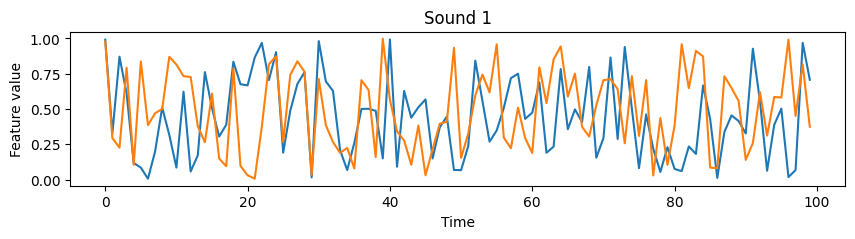

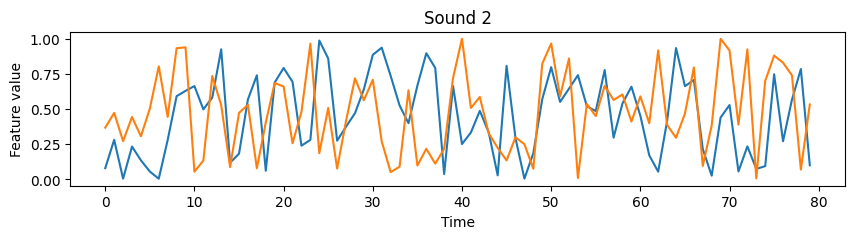

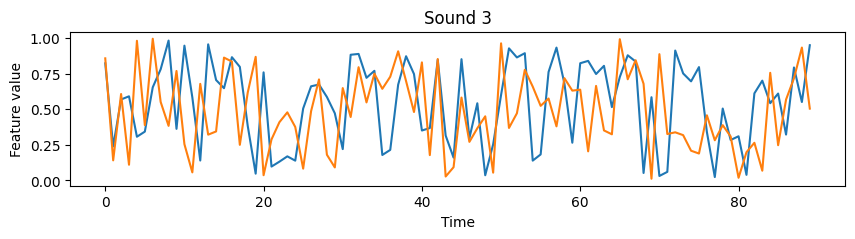

In [9]:
import matplotlib.pyplot as plt

# Plot each sound
for i, sound in enumerate(sounds_data, 1):
    plt.figure(figsize=(10, 2))
    plt.plot(sound)
    plt.title(f"Sound {i}")
    plt.xlabel("Time")
    plt.ylabel("Feature value")
    plt.show()
